<a href="https://colab.research.google.com/github/mikeacquaviva/APS360-Leukaemia-Classification/blob/main/cnn_leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
preprocessed_data_dir = ("/content/gdrive/MyDrive/APS360/processed")
classes = ['benign', 'early', 'pre', 'pro']
data_transform = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor()])
data_full = datasets.ImageFolder(preprocessed_data_dir, transform = data_transform)
print(len(data_full))
train  = len(data_full)*0.6
train = int(train) + 1
print(train)

val  = len(data_full)*0.2
val = int(val)
print(val)

train_full, val_full, test_full = random_split(data_full, [train, val, val], generator=torch.Generator().manual_seed(0)) #adding seed such that it produces the same data set each time
# print out some data stats
print('Num training images: ', len(train))
print('Num validation images: ', len(val))
print('Num test images: ', len(test))

KeyboardInterrupt: ignored

In [ ]:
data_dir = ("/content/gdrive/MyDrive/APS360/baseline/svm_images")
classes = ['benign', 'early', 'pre', 'pro']
data_transform = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor()])
data = datasets.ImageFolder(data_dir, transform = data_transform)
print(len(data))
train, val, test = random_split(data, [600, 105,  105], generator=torch.Generator().manual_seed(0)) #adding seed such that it produces the same data set each time
# print out some data stats
print('Num training images: ', len(train))
print('Num validation images: ', len(val))
print('Num test images: ', len(test))

810
Num training images:  600
Num validation images:  105
Num test images:  105


In [ ]:
# define dataloader parameters
batch_size = 32
num_workers = 1

# prepare data loaders
train_loader = 0
val_loader = 0
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=27, 
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=27, 
                                          num_workers=num_workers, shuffle=True)
print(len(train_loader))

23


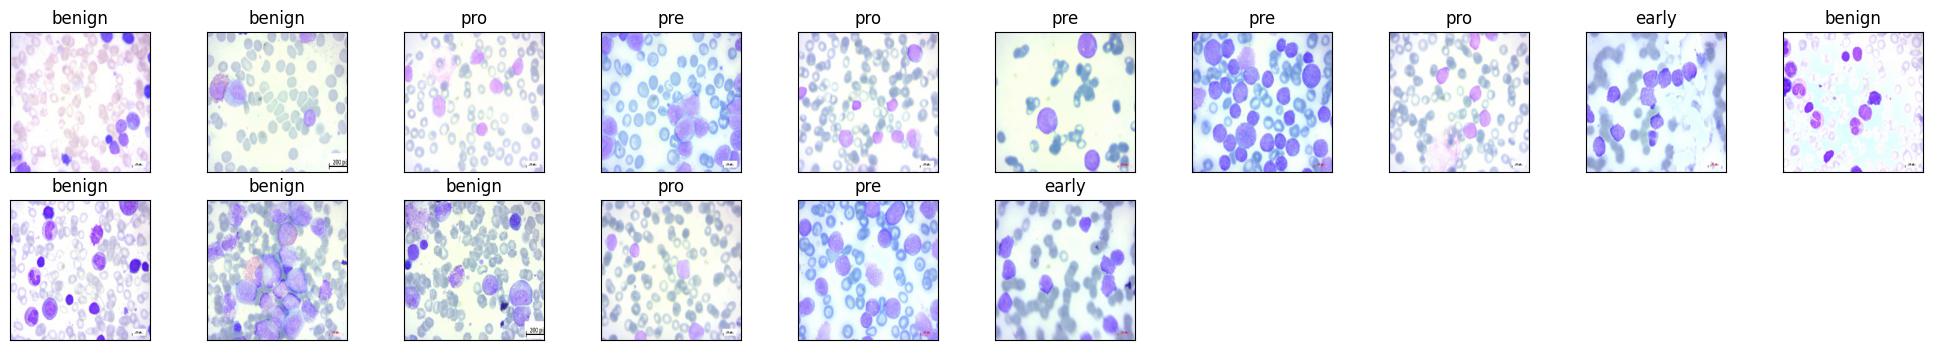

In [ ]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(0) # set the random seed

In [ ]:
def get_data_loader(target_classes, batch_size):
  classes = ['benign', 'early', 'pre', 'pro']
  

In [ ]:
def leakyrelu(x):
  if(x>=0):
    return x
  else:
    return 0.01*x  

In [ ]:
#Convolutional Neural Network Architecture
class CNN_leaky(nn.Module):
    def __init__(self):
        super(CNN_leaky, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 5, 3) #in_channels, out_chanels, kernel_size, 
        #convolution neural network and have to specify the number of inner terminals and define the kernel size.
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride  
        #shift the entire image by 2 kernsls
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10 * 53 * 53, 32) 
        #self.fc2 = nn.Linear(64, 32) 
        self.fc3 = nn.Linear(32, 4) #which letter from a-i as the options for output, so 9 outputs 

    def forward(self, x):
        y = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(y))) #flatten the layer
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


In [ ]:
#Convolutional Neural Network Architecture
class CNN_MNISTClassifier(nn.Module):
    def __init__(self):
        super(CNN_MNISTClassifier, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 5, 3) #in_channels, out_chanels, kernel_size, 
        #convolution neural network and have to specify the number of inner terminals and define the kernel size.
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride  
        #shift the entire image by 2 kernsls
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10 * 53 * 53, 32) 
        #self.fc2 = nn.Linear(64, 32) 
        self.fc3 = nn.Linear(32, 4) #which letter from a-i as the options for output, so 9 outputs 

    def forward(self, x):
        y = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(y))) #flatten the layer
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


In [ ]:
#helper function; label, evaluate
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        #labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

In [ ]:
def get_accuracy(model, data):

    correct = 0
    total = 0
    for imgs, labels in data:
        #print(imgs.size())
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [59]:
from torch.utils.data import DataLoader, Dataset
def train(model, batch_size, learning_rate, num_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    #scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.98)
    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    epoch = 0 # the number of iterations
    n = 0
    
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #print(labels)
            n+=1
            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model,train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print(("Epoch {}: Train acc: {}, Train loss: {} |"+
               "Validation err: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   losses[epoch],
                   val_acc[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        print(epoch, "acc:", train_acc[epoch])
    print("train_loader: ", n)     
    #draw_confusion_matrix(predicted_labels, actual_labels)
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def draw_confusion_matrix(predicted_labels, actual_labels):

    cm = confusion_matrix(actual_labels, predicted_labels)
    cm_df = pd.DataFrame(cm,
                     index = ['BENIGN','EARLY', 'PRE', 'PRO'], 
                     columns = ['BENIGN','EARLY', 'PRE', 'PRO'])

    plt.figure(figsize=(5,4))
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [53]:
def accuracy_class(model):
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}
  true_pos = {classname: 0 for classname in classes}
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    # collect the correct predictions for each class
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1
    #draw_confusion_matrix(prediction, correct_pred)
  #print accuracy for each class
  for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for {classname:5s} : {accuracy:.5f} %')

Epoch 1: Train acc: 0.25, Train loss: 0.0432233102619648 |Validation err: 0.20952380952380953
0 acc: 0.25
Epoch 2: Train acc: 0.255, Train loss: 0.042239461094141006 |Validation err: 0.22857142857142856
1 acc: 0.255
Epoch 3: Train acc: 0.33666666666666667, Train loss: 0.04372382164001465 |Validation err: 0.3523809523809524
2 acc: 0.33666666666666667
Epoch 4: Train acc: 0.5183333333333333, Train loss: 0.04222570359706879 |Validation err: 0.5428571428571428
3 acc: 0.5183333333333333
Epoch 5: Train acc: 0.43166666666666664, Train loss: 0.04357610642910004 |Validation err: 0.4
4 acc: 0.43166666666666664
Epoch 6: Train acc: 0.3383333333333333, Train loss: 0.04147840663790703 |Validation err: 0.3523809523809524
5 acc: 0.3383333333333333
Epoch 7: Train acc: 0.255, Train loss: 0.04277652129530907 |Validation err: 0.22857142857142856
6 acc: 0.255
Epoch 8: Train acc: 0.3283333333333333, Train loss: 0.03741894289851189 |Validation err: 0.4095238095238095
7 acc: 0.3283333333333333
Epoch 9: Train a

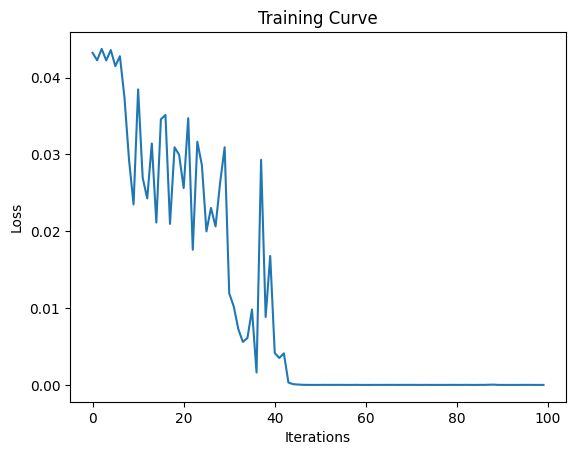

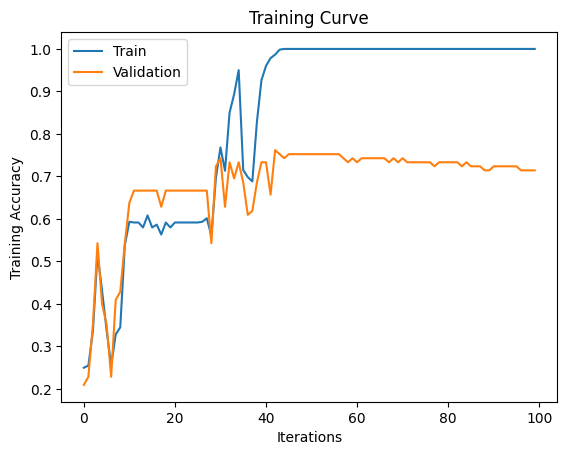

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7142857142857143


In [ ]:
more_net = CNN_leaky()

train(more_net, batch_size = 32, learning_rate = 0.01, num_epochs=100)
model_path = get_model_name(more_net.name, batch_size, 0.01, 100)
torch.save(more_net.state_dict(), model_path)

In [ ]:
model_path = get_model_name("Overfit Model", batch_size, 0.01, 100)
torch.save(more_net.state_dict(), model_path)

In [51]:
model = CNN_leaky()
model.load_state_dict(torch.load(model_path))
model.eval()

CNN_leaky(
  (conv1): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=28090, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)

In [54]:
accuracy_class(model)

Accuracy for benign : 72.00000 %
Accuracy for early : 58.62069 %
Accuracy for pre   : 60.71429 %
Accuracy for pro   : 100.00000 %


In [55]:
test_loader = torch.utils.data.DataLoader(test, batch_size=27, shuffle=True)
test_accuracy = get_accuracy(model, test_loader)
print("test accuracy:", test_accuracy)

test accuracy: 0.7142857142857143


#Model 2: Doing with same Number of Epochs as in Progress Report

Epoch 1: Train acc: 0.25, Train loss: 0.0412825383245945 |Validation err: 0.20952380952380953
0 acc: 0.25
Epoch 2: Train acc: 0.255, Train loss: 0.04381720349192619 |Validation err: 0.22857142857142856
1 acc: 0.255
Epoch 3: Train acc: 0.255, Train loss: 0.04318965598940849 |Validation err: 0.22857142857142856
2 acc: 0.255
Epoch 4: Train acc: 0.255, Train loss: 0.04345789551734924 |Validation err: 0.22857142857142856
3 acc: 0.255
Epoch 5: Train acc: 0.255, Train loss: 0.043070416897535324 |Validation err: 0.22857142857142856
4 acc: 0.255
Epoch 6: Train acc: 0.255, Train loss: 0.043481167405843735 |Validation err: 0.22857142857142856
5 acc: 0.255
Epoch 7: Train acc: 0.33666666666666667, Train loss: 0.043250370770692825 |Validation err: 0.3523809523809524
6 acc: 0.33666666666666667
Epoch 8: Train acc: 0.255, Train loss: 0.043726664036512375 |Validation err: 0.22857142857142856
7 acc: 0.255
Epoch 9: Train acc: 0.29, Train loss: 0.04112979397177696 |Validation err: 0.29523809523809524
8 acc

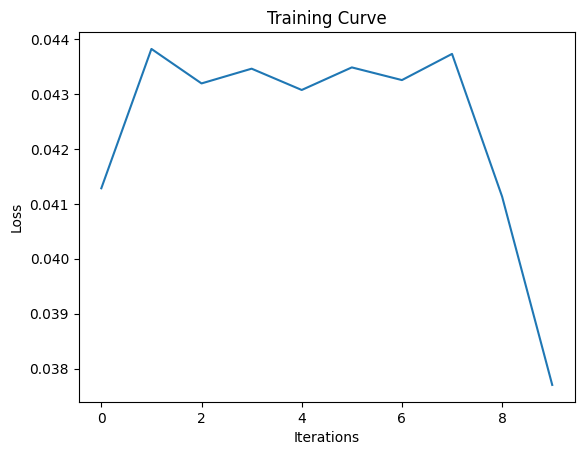

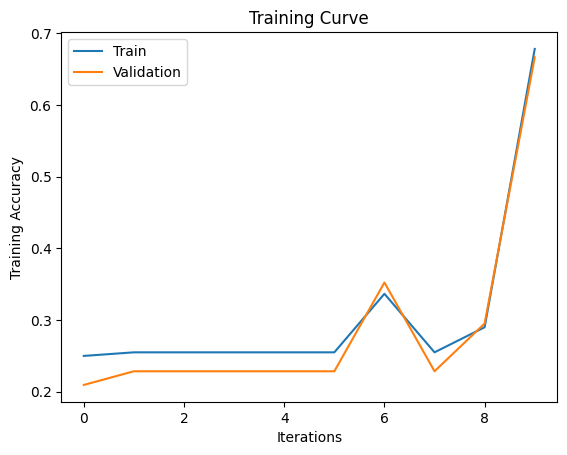

Final Training Accuracy: 0.6783333333333333
Final Validation Accuracy: 0.6666666666666666


In [68]:
more_net = CNN_leaky()

train(more_net, batch_size = 32, learning_rate = 0.01, num_epochs=10)

In [69]:
accuracy_class(more_net)

Accuracy for benign : 64.00000 %
Accuracy for early : 44.82759 %
Accuracy for pre   : 3.57143 %
Accuracy for pro   : 100.00000 %


In [70]:
model_path = get_model_name("TenEpochs", batch_size, 0.01, 10)
torch.save(more_net.state_dict(), model_path)